In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
from sklearn.cluster import KMeans

import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
countries_data = pd.read_csv('./datasets/Country-data.csv')
#countries_data = countries_data.drop(['income','imports','exports','gdpp'], axis=1)

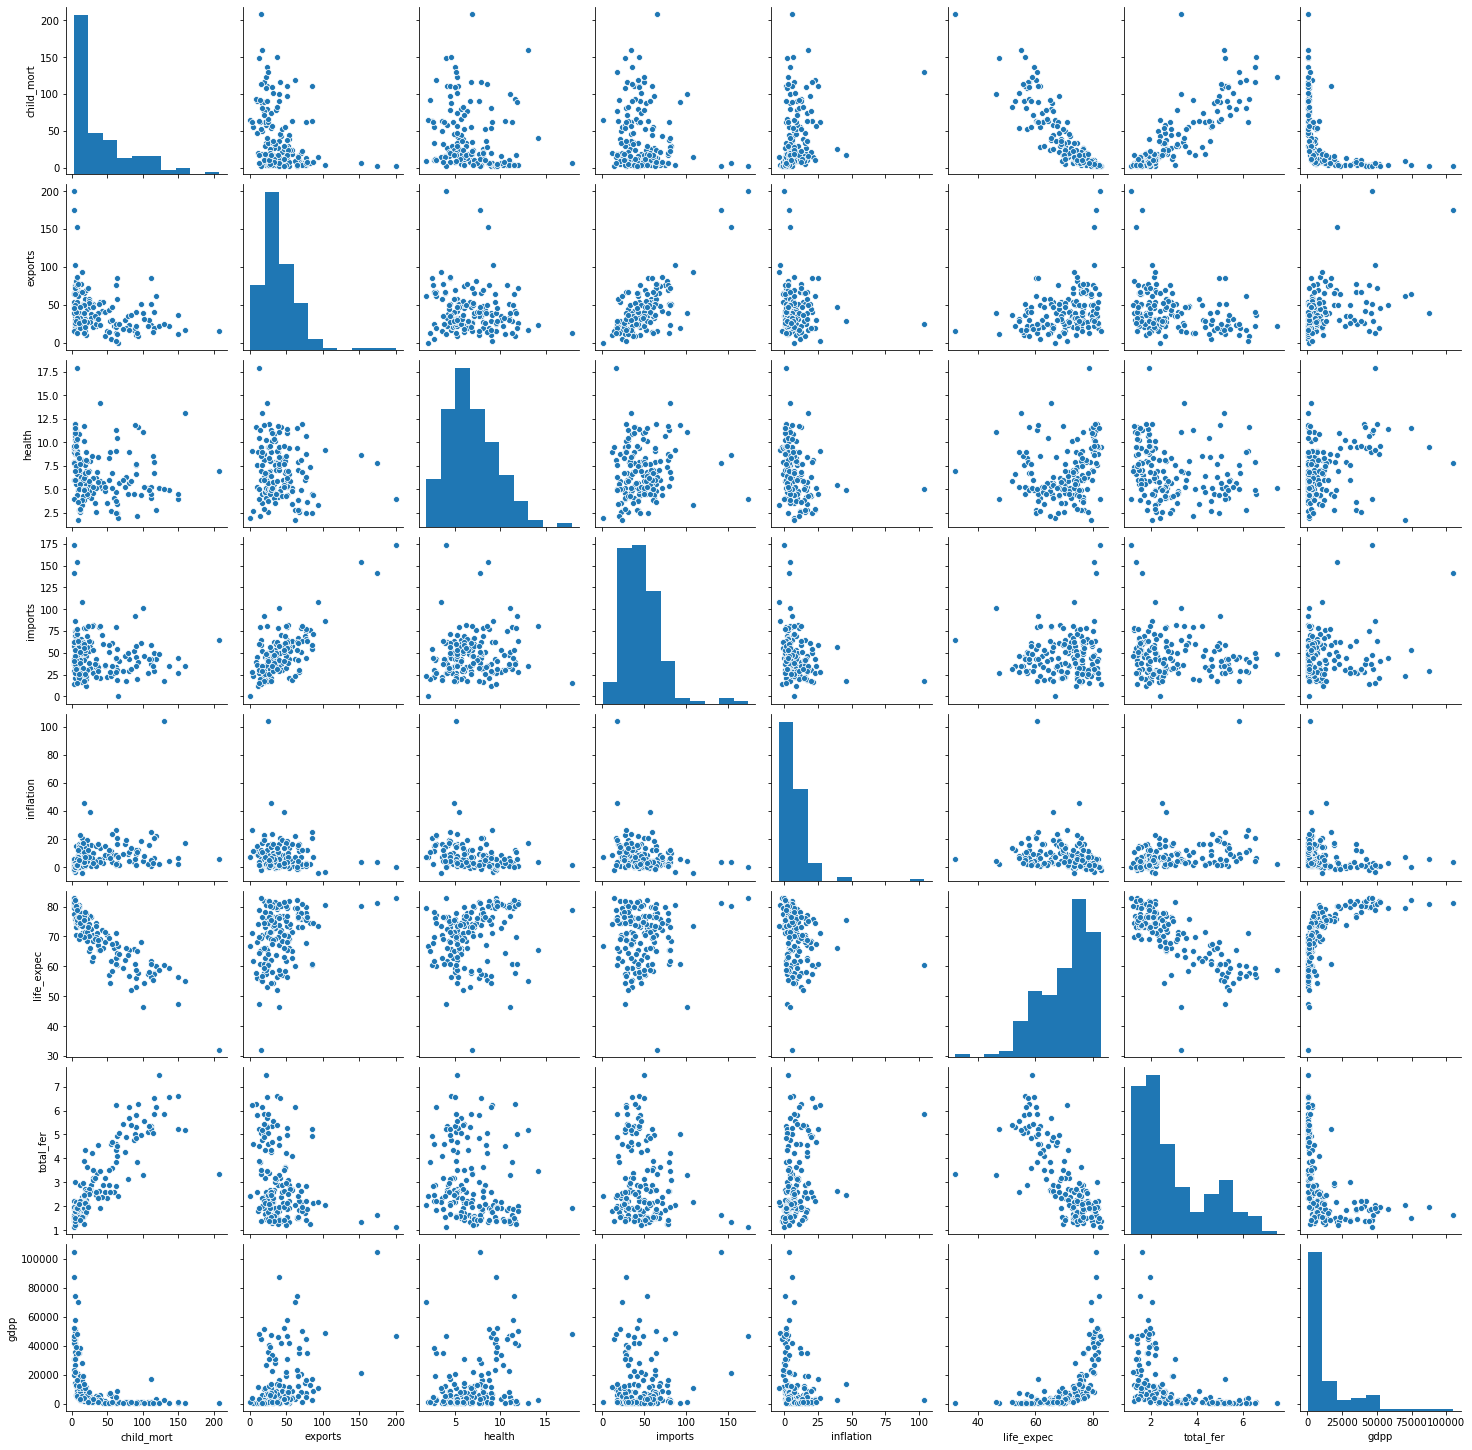

In [3]:
sns.pairplot(data=countries_data[['child_mort', 'exports', 'health', 'imports', 'inflation', 'life_expec', 'total_fer', 'gdpp']])

In [4]:
# Standardise the dataset
scaler = StandardScaler()
countries_data_w = countries_data.drop(['country'],axis=1)
countries_data_std = scaler.fit_transform(countries_data_w)
countries_data_std

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [30]:
# Defining Kmeans
clustering = KMeans(n_clusters = 4, random_state = 5)
clustering.fit(countries_data_std)
print(clustering.labels_)
countries_data["cluster labels"] = clustering.labels_
countries_data[countries_data["cluster labels"] == 3]

[1 0 0 1 0 0 0 2 2 0 2 0 0 0 0 2 0 1 0 0 0 0 0 2 0 1 1 0 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 0 0 2 2 1 1 0 2 1 2 0 0 1 1 0 1 0 2 0 0 0 0 2
 2 2 0 2 0 0 1 1 2 0 1 0 0 1 1 0 0 3 0 1 1 0 0 1 3 1 0 0 0 0 0 0 1 0 1 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 0 0 1 0 0 1 3 0 2 0 1 2 2 0 0 1 0 2 2 0 1
 0 1 1 0 0 0 0 1 0 2 2 2 0 0 0 0 0 1 1]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster labels
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,3


In [31]:
countries_data[countries_data["cluster labels"] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster labels
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2


In [32]:
countries_data[countries_data["cluster labels"] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1


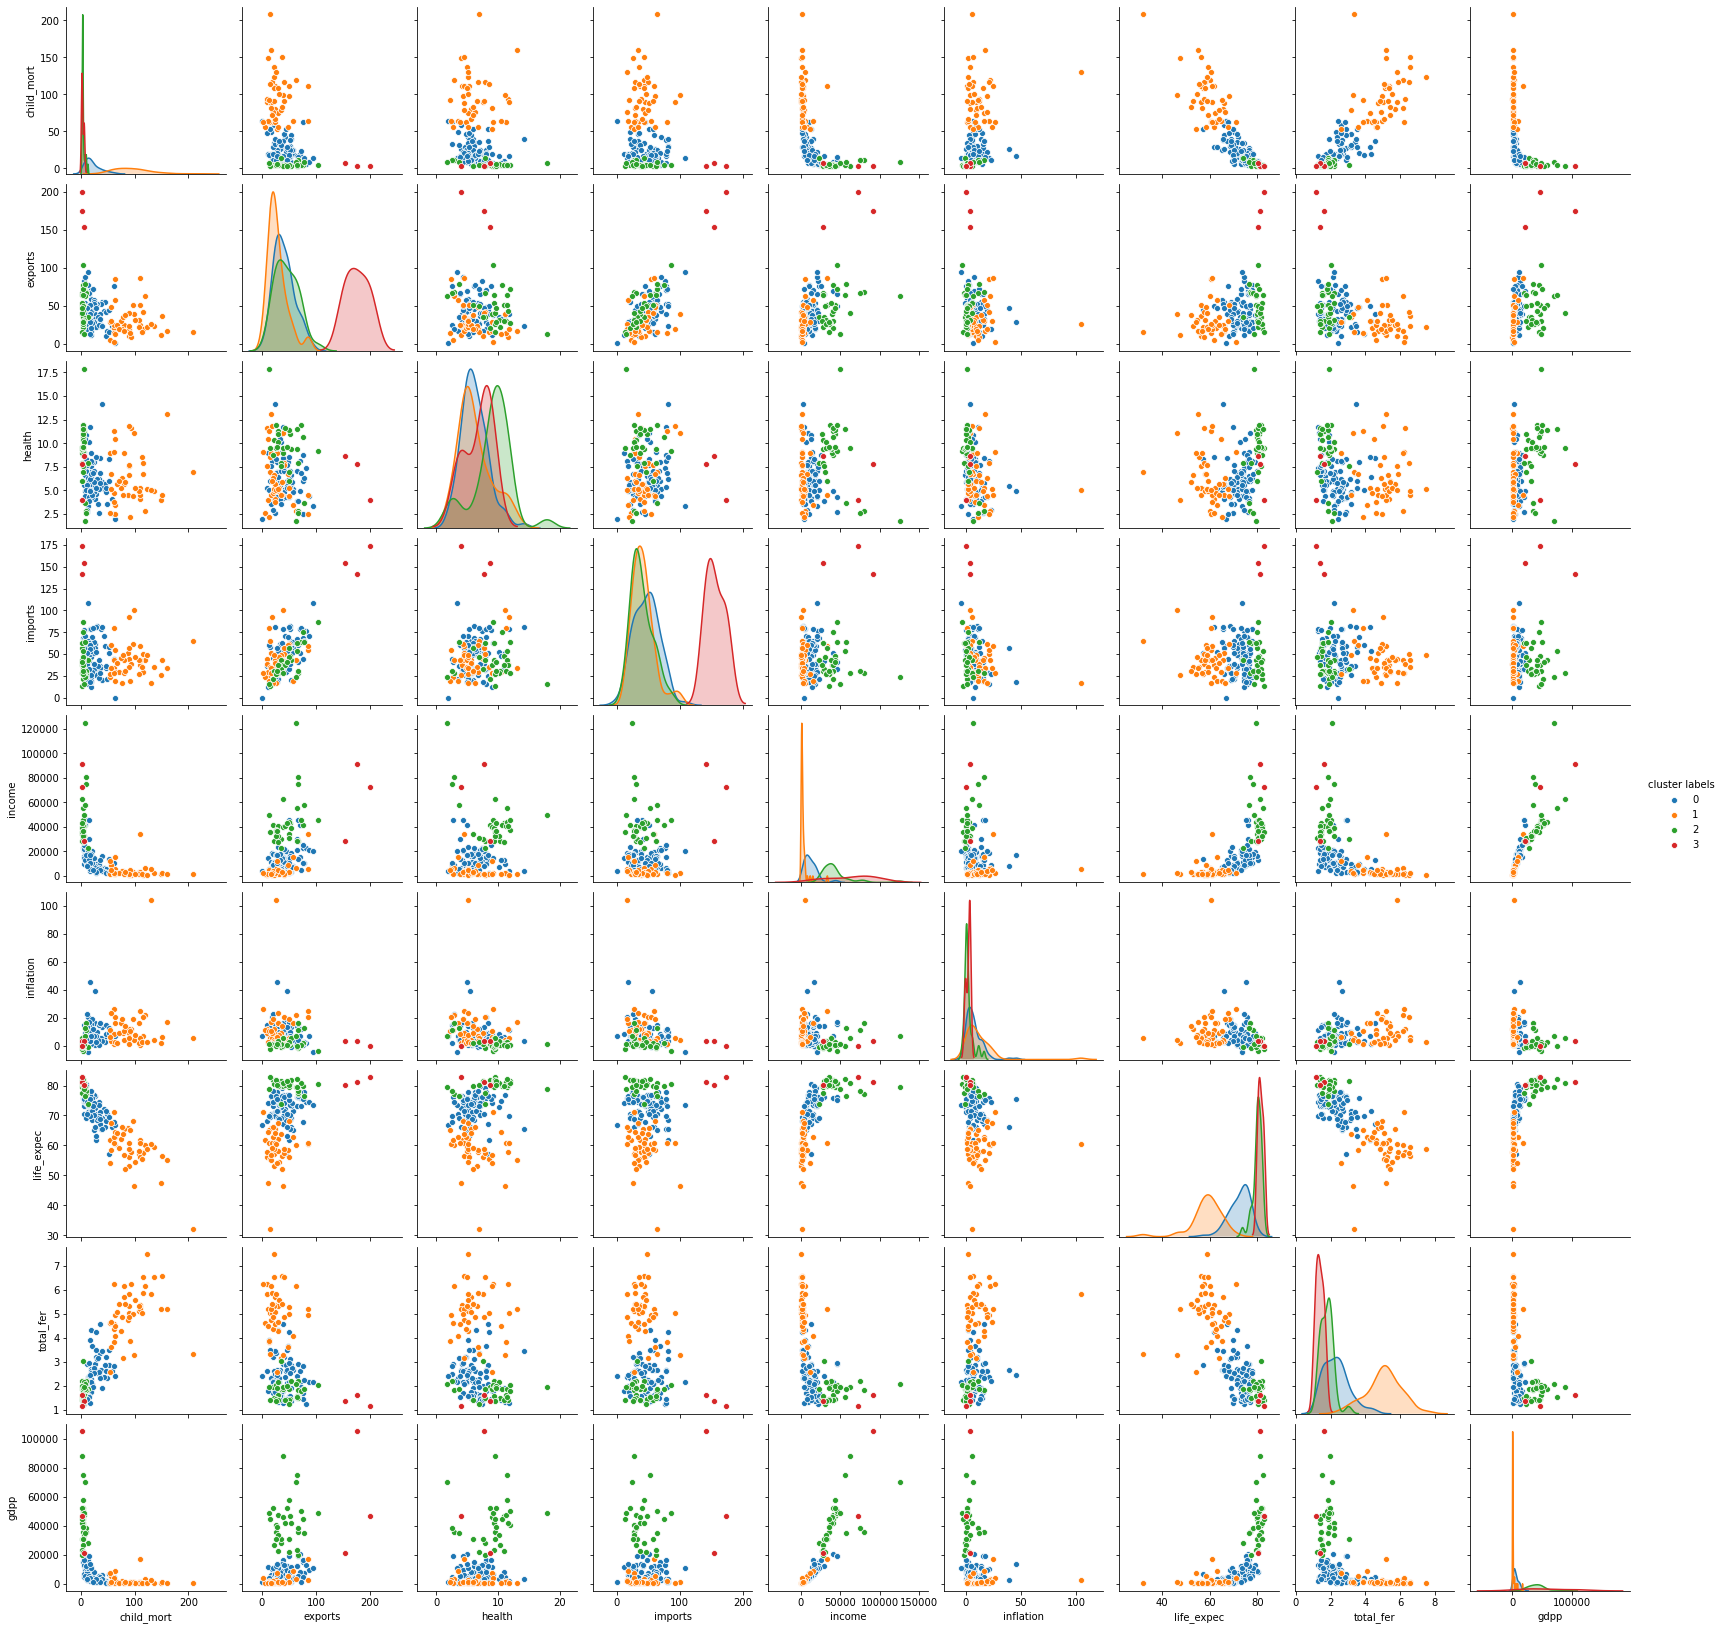

In [33]:
sns.pairplot(countries_data, hue='cluster labels')

In [34]:
countries_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [35]:
# Dimensionality Reduction with PCA
pca = PCA()
pca.fit(countries_data_std)

PCA()

In [36]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Cumulative explained variance')

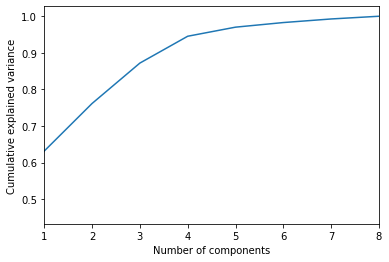

In [37]:
# Plot scree plot
fig, ax = plt.subplots()
sns.lineplot(data=pca.explained_variance_ratio_.cumsum(), ax=ax)

ax.set_xlim(1,8)
ax.set_xticks(range(1,9))
ax.set_xlabel("Number of components")
ax.set_ylabel("Cumulative explained variance")

By the scree plot:
Number of components = 4

In [38]:
pca = PCA(n_components=4)

In [39]:
# Perform dimension reduction
pca_result = pca.fit_transform(countries_data_std)

Text(0, 0.5, 'PC2')

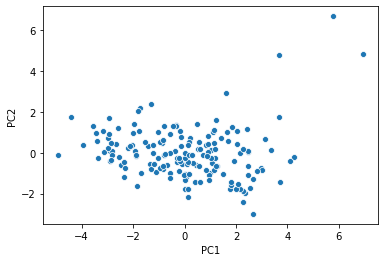

In [40]:
# Visualise PCA results
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")

In [41]:
PCA_components = pd.DataFrame(pca_result)
PCA_components

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


In [42]:
# KMeans with PCA
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

KMeans(n_clusters=4)

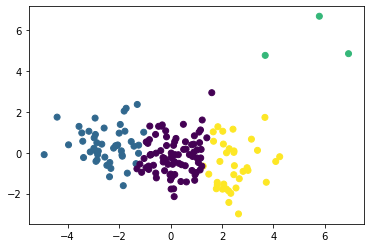

In [43]:
clusters = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=clusters)
plt.show()

In [44]:
cd1 = countries_data
Mutiple_Reg_data = cd1.drop([i for i in range(0,167,5)],axis = 0)
test_ys = cd1.iloc[[i for i in range(0,167,5)]]
train_ys = Mutiple_Reg_data['life_expec']

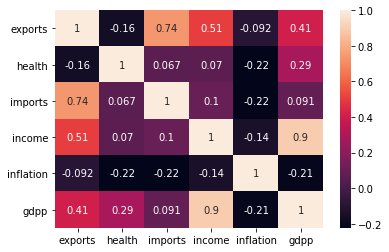

In [45]:
Mutiple_Reg_data.drop(['child_mort','total_fer','life_expec','cluster labels','country'],axis=1, inplace=True)
sns.heatmap(Mutiple_Reg_data.corr(), annot=True)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
ln = LinearRegression()
ln.fit(Mutiple_Reg_data, train_ys)
train_ys

1      76.3
2      76.5
3      60.1
4      76.8
6      73.3
       ... 
161    68.8
162    63.0
163    75.4
164    73.1
166    52.0
Name: life_expec, Length: 133, dtype: float64

In [50]:
test_ys= cd1.iloc[[i for i in range(0,167,5)]]
y_true = test_ys['life_expec']
test_ys.drop(['child_mort','total_fer','life_expec','cluster labels','country'],axis=1, inplace=True)
y_pred = ln.predict(test_ys)
print(y_pred)
cd1.iloc[[i for i in range(0,167,5)]]

[64.522035   70.2651424  73.58562026 79.23099617 70.08625708 67.15672416
 65.45867918 70.54120208 68.79839979 68.67798726 63.67741139 72.05640085
 75.28713695 65.46704489 66.47455128 77.29767527 66.75126131 72.08808897
 72.1664484  71.97325866 69.89816044 67.98497677 81.67250791 74.90867563
 67.61621107 70.92286687 70.30777339 75.90742516 64.59546247 84.82208764
 67.56667223 67.60691294 72.25939923 65.20590044]


C:\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
10,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
15,Belgium,4.5,76.40,10.70,74.7,41100,1.880,80.0,1.86,44400,2
20,Bosnia and Herzegovina,6.9,29.70,11.10,51.3,9720,1.400,76.8,1.31,4610,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
30,Cape Verde,26.5,32.70,4.09,61.8,5830,0.505,72.5,2.67,3310,0
35,Colombia,18.6,15.90,7.59,17.8,10900,3.860,76.4,2.01,6250,0
40,Cote d'Ivoire,111.0,50.60,5.30,43.3,2690,5.390,56.3,5.27,1220,1
45,Dominican Republic,34.4,22.70,6.22,33.3,11100,5.440,74.6,2.60,5450,0


In [51]:
from sklearn import metrics
metrics.mean_squared_error(y_true, y_pred, squared=False)

5.632141973915171

In [52]:
# Reload country data
countries_data = pd.read_csv('./datasets/Country-data.csv')

In [26]:
# Multiple regression using statsmodel
model = smf.ols('life_expec ~ exports + health + imports + income + inflation + gdpp', data=countries_data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             life_expec   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           2.71e-17
Time:                        13:20:05   Log-Likelihood:                -554.87
No. Observations:                 167   AIC:                             1124.
Df Residuals:                     160   BIC:                             1146.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.6440      2.140     30.679      0.000      61.418      69.870
exports        0.0867      0.043      2.035      0.043       0.003       0.171
health         0.4655      0.254      1.836      0.068      -0.035       0.966
imports       -0.0930      0.042     -2.231      0.027      -0.175      -0.011
income         0.0002   7.33e-05      2.399      0.018    3.11e-05       0.000
inflation     -0.1350      0.055     -2.459      0.015      -0.243      -0.027
gdpp        4.392e-05    7.7e-05      0.570      0.569      -0.000       0.000
==============================================================================
Omnibus:                       44.981   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.934
Skew:                          -1.289   Prob(JB):                     9.80e-19
Kurtosis:                       5.297   Cond. No.                     1.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
MSE = results.mse_resid

RMSE = np.sqrt(MSE)
RMSE

6.8553594193331335